In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from scipy.stats import skew

In [2]:
df = pd.read_csv('cars.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
104     6
128     6
134     6
65      5
74      5
168     5
95      5
102     5
103     5
85      5
94      5
148     4
93      4
106     4
118     4
122     4
101     3
83      3
125     3
137     3
115     3
154     3
113     2
89      2
158     2
87      2
81      2
119     2
194     2
110     2
188     2
164     2
145     2
153     2
129     2
108     2
192     2
197     2
78      1
142     1
121     1
231     1
186     1
107     1
256     1
90      1
77      1
98      1
Name: normalized-losses, dtype: int64

In [7]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
62      6
114     6
88      6
101     6
160     6
145     5
82      5
97      5
76      5
84      5
102     5
86      4
111     4
92      4
123     4
90      3
121     3
152     3
73      3
207     3
182     3
85      3
184     2
112     2
52      2
162     2
156     2
94      2
?       2
100     2
161     2
56      2
176     2
155     2
115     1
78      1
288     1
106     1
154     1
55      1
48      1
72      1
64      1
60      1
175     1
143     1
135     1
262     1
140     1
142     1
134     1
200     1
120     1
58      1
Name: horsepower, dtype: int64

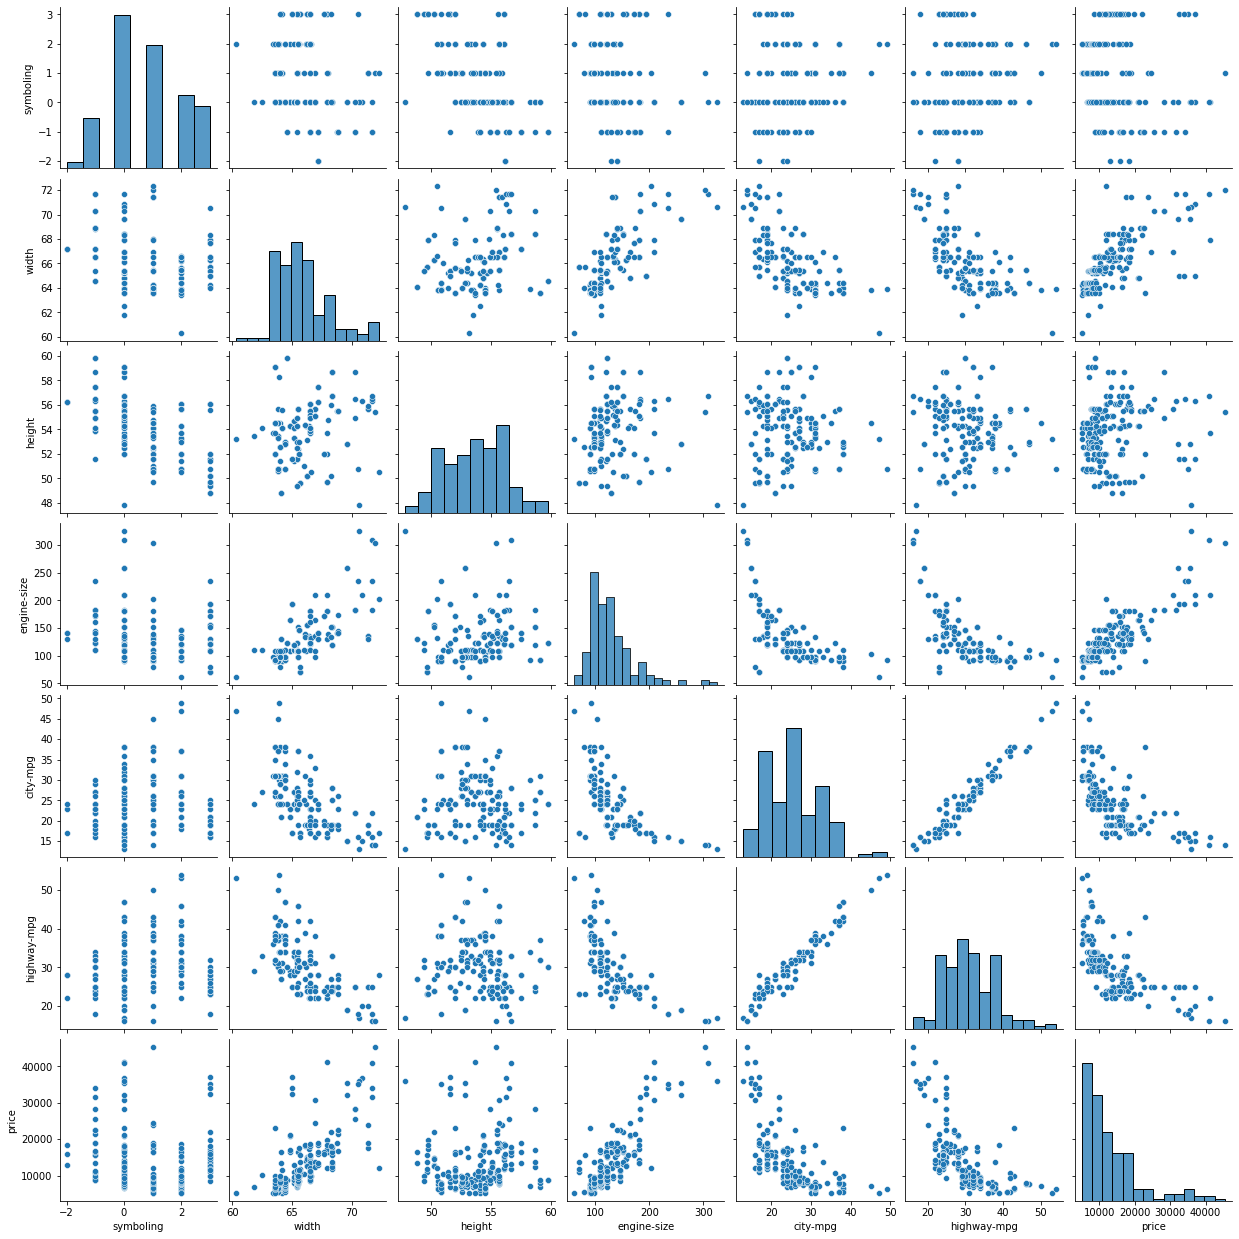

In [8]:
sns.pairplot(df)

<AxesSubplot:xlabel='price'>

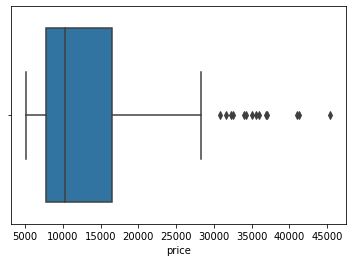

In [40]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='make'>

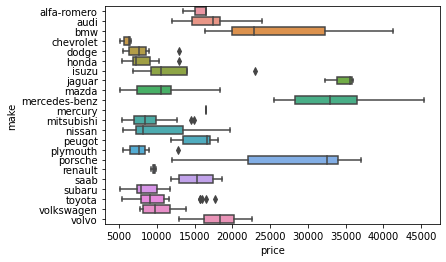

In [41]:
sns.boxplot(x='price',y='make',data=df)

In [10]:
df['normalized-losses'].replace('?', np.nan, inplace=True)
df['horsepower'].replace('?',np.nan, inplace=True)

In [11]:
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)

In [12]:
nlmean = df['normalized-losses'].mean()
hpmean = df['horsepower'].mean()

In [13]:
df['normalized-losses'].fillna(nlmean, inplace = True)
df['horsepower'].fillna(hpmean, inplace = True)

In [14]:
dfnum = df.select_dtypes(['float','int64'])
dfcat = df.select_dtypes(['object'])

In [15]:
dfnum

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [16]:
dfcat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [44]:
skew(dfnum['normalized-losses'])

0.8485348696008058

symboling
0.20952469094997359


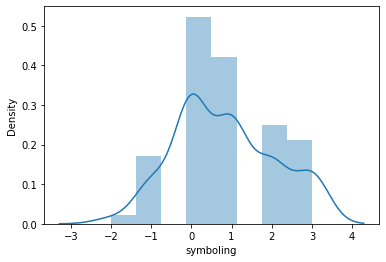

normalized-losses
0.8485348696008058


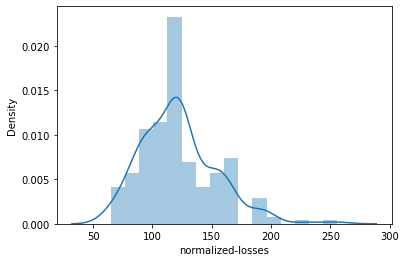

width
0.8973753485201392


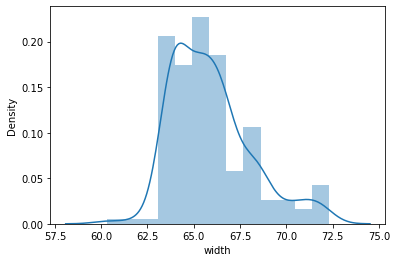

height
0.06265991683394276


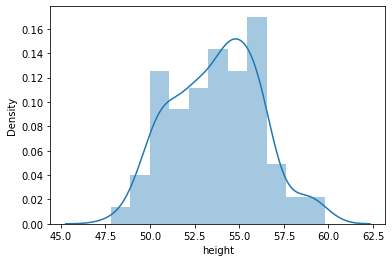

engine-size
1.9333748457840114


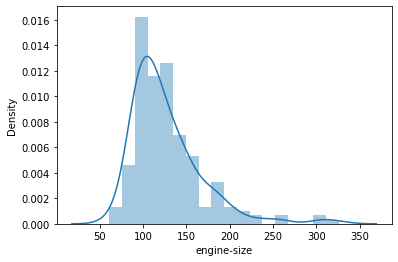

horsepower
1.3875147343096037


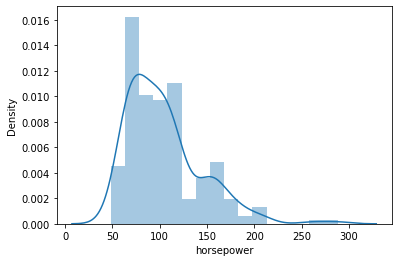

city-mpg
0.6588377533622138


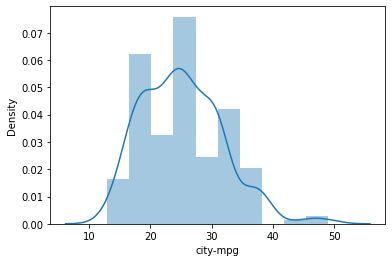

highway-mpg
0.5360379305163596


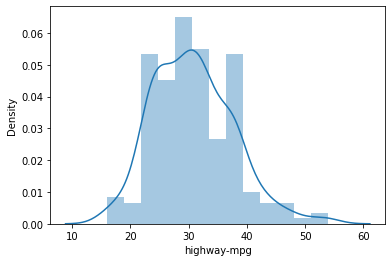

price
1.791937476907277


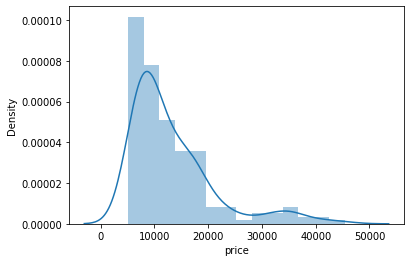

In [46]:
for col in dfnum:
  print(col)
  print(skew(dfnum[col]))

  plt.figure()
  sns.distplot(dfnum[col])
  plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
for col in dfcat:
    le = LabelEncoder()
    dfcat[col] = le.fit_transform(dfcat[col])

In [19]:
dfcat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [20]:
df2 = pd.concat([dfcat,dfnum],axis=1)
df2.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [21]:
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1:]

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.23,random_state = 1)

In [23]:
linreg = LinearRegression()
linreg.fit(xtrain,ytrain)
ypred = linreg.predict(xtest)

In [24]:
print(f'MAE   :- {mae(ytest,ypred)}')
print(f'MSE   :- {mse(ytest,ypred)}')
print(f'RMSE  :- {np.sqrt(mse(ytest,ypred))}')
print(f'R2   :- {r2_score(ytest,ypred)}')

MAE   :- 2380.113990406108
MSE   :- 12075284.310413858
RMSE  :- 3474.9509795699073
R2   :- 0.8195634739036791


In [25]:
linreg.coef_

array([[-1.93616078e+02, -4.45374417e+02, -2.18321232e+02,
         2.01610709e+03,  1.60784352e+04,  3.15111952e+02,
         5.41647248e+01, -3.12401918e+00,  8.09705181e+02,
         2.97150089e+02,  9.59895842e+01, -1.11668631e+01,
         2.31774179e+02, -3.47917127e+02]])

In [26]:
linreg.score(xtrain,ytrain)

0.8403634781356677

In [27]:
from sklearn.linear_model import Lasso

In [28]:
l1 = Lasso(alpha=0,max_iter=1000)
l1.fit(xtrain,ytrain)

l1.coef_

array([-1.93616078e+02, -4.45374417e+02, -2.18321232e+02,  2.01610709e+03,
        1.60784352e+04,  3.15111952e+02,  5.41647248e+01, -3.12401918e+00,
        8.09705181e+02,  2.97150089e+02,  9.59895842e+01, -1.11668631e+01,
        2.31774179e+02, -3.47917127e+02])

In [29]:
l1.score(xtrain,ytrain)

0.8403634781356677

In [30]:
ypredl1 = l1.predict(xtest)

In [31]:
print(f'MAE   :- {mae(ytest,ypredl1)}')
print(f'MSE   :- {mse(ytest,ypredl1)}')
print(f'RMSE  :- {np.sqrt(mse(ytest,ypredl1))}')
print(f'R2   :- {r2_score(ytest,ypredl1)}')

MAE   :- 2380.1139904060983
MSE   :- 12075284.31041377
RMSE  :- 3474.9509795698946
R2   :- 0.8195634739036805


In [32]:
from sklearn.linear_model import Ridge

In [33]:
l2 = Ridge(alpha=0)
l2.fit(xtrain,ytrain)

l2.coef_

array([[-1.93616078e+02, -4.45374417e+02, -2.18321232e+02,
         2.01610709e+03,  1.60784352e+04,  3.15111952e+02,
         5.41647248e+01, -3.12401918e+00,  8.09705181e+02,
         2.97150089e+02,  9.59895842e+01, -1.11668631e+01,
         2.31774179e+02, -3.47917127e+02]])

In [34]:
l2.score(xtrain,ytrain)

0.8403634781356677

In [35]:
l2pred = l2.predict(xtest)

In [36]:
print(f'MAE   :- {mae(ytest,l2pred)}')
print(f'MSE   :- {mse(ytest,l2pred)}')
print(f'RMSE  :- {np.sqrt(mse(ytest,l2pred))}')
print(f'R2   :- {r2_score(ytest,l2pred)}')

MAE   :- 2380.1139904061038
MSE   :- 12075284.31041381
RMSE  :- 3474.9509795699005
R2   :- 0.8195634739036799


In [37]:
for i in range(50):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    
    print(f'{i}:-  {l2.score(xtrain,ytrain)}')
    

0:-  0.8403634781356677
1:-  0.8341821289226756
2:-  0.826907060056647
3:-  0.8213133107175635
4:-  0.817058186810968
5:-  0.8137337328835291
6:-  0.8110590073115141
7:-  0.8088498040774239
8:-  0.8069837067545181
9:-  0.8053772197693913
10:-  0.8039718218572174
11:-  0.8027254376944446
12:-  0.8016071114542732
13:-  0.8005935940536624
14:-  0.7996670999795392
15:-  0.7988137969944171
16:-  0.7980227665396976
17:-  0.7972852735636056
18:-  0.79659424418626
19:-  0.7959438857568617
20:-  0.7953294062505255
21:-  0.7947468041299566
22:-  0.7941927089574727
23:-  0.7936642590740551
24:-  0.7931590067030704
25:-  0.792674843587996
26:-  0.7922099421756104
27:-  0.7917627086894345
28:-  0.7913317453850142
29:-  0.7909158199591367
30:-  0.7905138405797393
31:-  0.790124835366619
32:-  0.7897479354226469
33:-  0.7893823607170366
34:-  0.7890274082746933
35:-  0.7886824422417995
36:-  0.7883468854869107
37:-  0.7880202124657447
38:-  0.7877019431315122
39:-  0.7873916377146577
40:-  0.78708889

In [47]:
l2 = Ridge(alpha = 0)
l2.fit(xtrain,ytrain)
l2pred = l2.predict(xtest)

In [48]:
l2.score(xtrain, ytrain)

0.8403634781356677